# Introducción a PySpark

En este notebook se trabajarán algunas de las herramientas básicas de pyspark, como la creación de dataframes, el filtrado de datos y la realización de consultas SQL a los dataframes.


In [ ]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Spark

Apache Spark es un framework Open source para procesamiento de datos a gran escala.

https://spark.apache.org/docs/latest/

# Características de Spark

*    Computación en memoria principal
*    Procesamiento distribuido usando paralelización
*    Puede ser usado en variedad de clúster managers (Spark, Yarn, Mesos, etc)
*    Tolerante a fallos
*    Inmutable
*    Lazy evaluation
*    Cache & persistencia
*    Inbuild-optimization usando DataFrames
*    Soporta ANSI SQL

# Ventajas de Spark

* Spark es un motor de procesamiento distribuido de propósito general, en memoria y tolerante a fallos que permite procesar datos de forma eficiente y distribuida.
* Las aplicaciones que se ejecutan en Spark son 100 veces más rápidas que los sistemas tradicionales.
* Usando Spark podemos procesar datos de Hadoop HDFS, AWS S3, Databricks DBFS, Azure Blob Storage, y muchos sistemas de archivos.
* Spark también se utiliza para procesar datos en tiempo real utilizando Streaming y Kafka.
* Spark cuenta de forma nativa con bibliotecas de aprendizaje automático y gráficas.

## Configuración de PySpark

Documentación: https://spark.apache.org/docs/latest/cluster-overview

El Driver Program será un proceso que ejecutará el código de nuestra aplicación Spark, siendo el SparkContext el componente principal.

El Cluster Manager es el encargado de manejar y hacer accesibles un conjunto de Executors, que tendrán varias tareas en ejecución de forma simultánea.

Después de establecer la relación de Executors, el SparkContext se comunica directamente con dichos Executors.

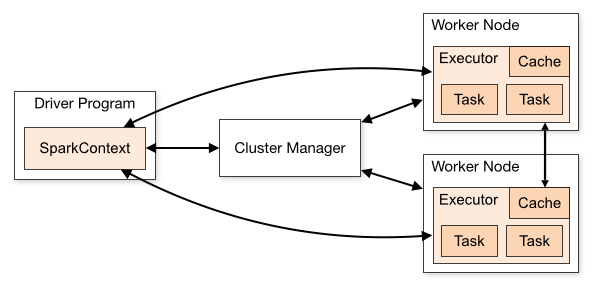

## SparkSession

Una SparkSession es un punto de entrada a la funcionalidad de Spark. Nos proporciona soporte para realizar queries y leer datos de tablas.

In [ ]:
# Creación de SparkSession y SparkContext

from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder\
        .master("local[*]")\
        .appName("PySpark")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

sc = SparkContext.getOrCreate()

In [ ]:
spark

## Ejemplo de uso de Dataframes en Spark

In [ ]:
file_path = './sample_data/california_housing_test.csv'
df = spark.read.csv(file_path, inferSchema=True, header=True)

In [ ]:
# Mostramos las primeras 10 filas
df.show(10)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|
|   -118.3|   34.26|              43.0|     1510.0|         310.0|     809.0|     277.0|        3.599|          176500.0|
|  -117.81|   33.78|              27.0|     3589.0|         507.0|    1484.0|     495.0|       5.7934|          270500.0|
|  -118.36|   33.82|              28.0|       67.0|          15.0|      49.0|      11.0|       6.1359|          330000.0|
|  -119.67|   36.33|              19.0|     1241.0|         244.0|     850.0|     237.0|       2.9375|           81700.0|
|  -119.56|   36.51|    

In [ ]:
# Mostramos el Schema
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [ ]:
df_pandas = df.toPandas()
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
# Mostramos las columnas
df.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
# Descripción estadística del DataFrame
df.describe().show()

+-------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|    total_bedrooms|        population|        households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               3000|              3000|              3000|             3000|              3000|              3000|              3000|              3000|              3000|
|   mean|-119.58920000000029| 35.63538999999999|28.845333333333333|2599.578666666667| 529.9506666666666|1402.7986666666666|           489.912| 3.807271799999998|        205846.275|
| stddev| 1.9949362939550166|2.1296695233438334|12.555395554955757|2155.593331625582|415.654368

In [ ]:
df.describe().toPandas()

,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,count,3000,3000,3000,3000,3000,3000,3000,3000,3000
1,mean,-119.58920000000029,35.63538999999999,28.845333333333333,2599.578666666667,529.9506666666666,1402.7986666666666,489.912,3.807271799999998,205846.275
2,stddev,1.9949362939550166,2.1296695233438334,12.555395554955757,2155.593331625582,415.65436813632306,1030.5430124122424,365.42270980552615,1.8545117296914775,113119.68746964622
3,min,-124.18,32.56,1.0,6.0,2.0,5.0,2.0,0.4999,22500.0
4,max,-114.49,41.92,52.0,30450.0,5419.0,11935.0,4930.0,15.0001,500001.0


In [ ]:
# Descripción de campos a elección
df.describe(['total_rooms']).show()

+-------+-----------------+
|summary|      total_rooms|
+-------+-----------------+
|  count|             3000|
|   mean|2599.578666666667|
| stddev|2155.593331625582|
|    min|              6.0|
|    max|          30450.0|
+-------+-----------------+



## Select

Se pueden obtener campos concretos de un dataframe usando select, de forma similar a cómo obtenemos los campos de un dataframe de pandas usando el método select con la lista de campos como parámetro.

In [ ]:
# Obtenemos los campos population y latitude del dataframe

df.select(['population', 'latitude']).show()

+----------+--------+
|population|latitude|
+----------+--------+
|    1537.0|   37.37|
|     809.0|   34.26|
|    1484.0|   33.78|
|      49.0|   33.82|
|     850.0|   36.33|
|     663.0|   36.51|
|     604.0|   38.63|
|    1341.0|   35.48|
|    1446.0|    38.4|
|    2830.0|   34.08|
|    1288.0|   33.98|
|     564.0|   35.85|
|     535.0|   37.25|
|    1935.0|   32.97|
|    1217.0|   33.73|
|     157.0|   33.81|
|     189.0|   37.53|
|    1603.0|   38.69|
|     654.0|   34.21|
|    3450.0|   38.01|
+----------+--------+
only showing top 20 rows



## Filtrado de datos

A continuación se muestra la aplicación del método filter en dataframes de spark.

In [ ]:
df.filter(df.population > 1000).count()

1798

In [ ]:
df[df.population > 1000].count()

1798

In [ ]:
# Aplicando un NOT con ~
df.filter(~(df.latitude > 32.56)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.09|   32.56|               8.0|      864.0|         156.0|     626.0|     172.0|       4.8984|          151500.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
# Filtrado de datos usando col de SQL

from pyspark.sql.functions import col

df.filter(~(col('latitude') > 32.56)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.09|   32.56|               8.0|      864.0|         156.0|     626.0|     172.0|       4.8984|          151500.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
# Filtrando datos usando expresiones SQL
df.filter("latitude <= 32.56").show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.09|   32.56|               8.0|      864.0|         156.0|     626.0|     172.0|       4.8984|          151500.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
# Aplicación de un filtro con condiciones múltiples
df.filter((df.latitude > 32.56) & (df.housing_median_age == 1.0)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.95|   35.08|               1.0|       83.0|          15.0|      32.0|      15.0|        4.875|          141700.0|
|  -116.95|   33.86|               1.0|        6.0|           2.0|       8.0|       2.0|        1.625|           55000.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
# Filtros basados en listas

l = [35.08, 33.86]

df.filter(df.latitude.isin(l)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.97|   33.86|              35.0|     1691.0|         367.0|    1265.0|     378.0|       3.5855|          174300.0|
|  -118.38|   33.86|              24.0|     3124.0|         560.0|    1312.0|     542.0|       6.3021|          333800.0|
|  -118.13|   33.86|              45.0|     1320.0|         256.0|     645.0|     256.0|          4.4|          209500.0|
|  -117.95|   35.08|               1.0|       83.0|          15.0|      32.0|      15.0|        4.875|          141700.0|
|  -118.38|   33.86|              12.0|     4235.0|         735.0|    1798.0|     683.0|       6.4242|          365500.0|
|  -116.95|   33.86|    

In [ ]:
# Otros filtros

df_json = spark.read.json('./sample_data/anscombe.json')
df_json.show()

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|  null|null| null|              [|
|     I|10.0| 8.04|           null|
|     I| 8.0| 6.95|           null|
|     I|13.0| 7.58|           null|
|     I| 9.0| 8.81|           null|
|     I|11.0| 8.33|           null|
|     I|14.0| 9.96|           null|
|     I| 6.0| 7.24|           null|
|     I| 4.0| 4.26|           null|
|     I|12.0|10.84|           null|
|     I| 7.0| 4.81|           null|
|     I| 5.0| 5.68|           null|
|    II|10.0| 9.14|           null|
|    II| 8.0| 8.14|           null|
|    II|13.0| 8.74|           null|
|    II| 9.0| 8.77|           null|
|    II|11.0| 9.26|           null|
|    II|14.0|  8.1|           null|
|    II| 6.0| 6.13|           null|
|    II| 4.0|  3.1|           null|
+------+----+-----+---------------+
only showing top 20 rows



In [ ]:
df_json.printSchema()

root
 |-- Series: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- _corrupt_record: string (nullable = true)



In [ ]:
df_json.filter(df_json.Series.startswith("I")).show()

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|     I|10.0| 8.04|           null|
|     I| 8.0| 6.95|           null|
|     I|13.0| 7.58|           null|
|     I| 9.0| 8.81|           null|
|     I|11.0| 8.33|           null|
|     I|14.0| 9.96|           null|
|     I| 6.0| 7.24|           null|
|     I| 4.0| 4.26|           null|
|     I|12.0|10.84|           null|
|     I| 7.0| 4.81|           null|
|     I| 5.0| 5.68|           null|
|    II|10.0| 9.14|           null|
|    II| 8.0| 8.14|           null|
|    II|13.0| 8.74|           null|
|    II| 9.0| 8.77|           null|
|    II|11.0| 9.26|           null|
|    II|14.0|  8.1|           null|
|    II| 6.0| 6.13|           null|
|    II| 4.0|  3.1|           null|
|    II|12.0| 9.13|           null|
+------+----+-----+---------------+
only showing top 20 rows



In [ ]:
df_json.filter(df_json.Series.contains("II")).show()

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|    II|10.0| 9.14|           null|
|    II| 8.0| 8.14|           null|
|    II|13.0| 8.74|           null|
|    II| 9.0| 8.77|           null|
|    II|11.0| 9.26|           null|
|    II|14.0|  8.1|           null|
|    II| 6.0| 6.13|           null|
|    II| 4.0|  3.1|           null|
|    II|12.0| 9.13|           null|
|    II| 7.0| 7.26|           null|
|    II| 5.0| 4.74|           null|
|   III|10.0| 7.46|           null|
|   III| 8.0| 6.77|           null|
|   III|13.0|12.74|           null|
|   III| 9.0| 7.11|           null|
|   III|11.0| 7.81|           null|
|   III|14.0| 8.84|           null|
|   III| 6.0| 6.08|           null|
|   III| 4.0| 5.39|           null|
|   III|12.0| 8.15|           null|
+------+----+-----+---------------+
only showing top 20 rows



In [ ]:
df_json.select(df_json.Series).distinct().show()

+------+
|Series|
+------+
|  null|
|   III|
|    IV|
|    II|
|     I|
+------+



In [ ]:
df_filtered = df_json.filter(df_json.Series.like("%III%"))
df_filtered.show()

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|   III|10.0| 7.46|           null|
|   III| 8.0| 6.77|           null|
|   III|13.0|12.74|           null|
|   III| 9.0| 7.11|           null|
|   III|11.0| 7.81|           null|
|   III|14.0| 8.84|           null|
|   III| 6.0| 6.08|           null|
|   III| 4.0| 5.39|           null|
|   III|12.0| 8.15|           null|
|   III| 7.0| 6.42|           null|
|   III| 5.0| 5.73|           null|
+------+----+-----+---------------+



## Modos de escritura

Existen los siguientes modos de escritura de datos:

*   append: Append contents of this DataFrame to existing data.
*   overwrite: Overwrite existing data.
*   error or errorifexists: Throw an exception if data already exists.
*   ignore: Silently ignore this operation if data already exists.

In [ ]:
# Escritura en un csv. Se crea un directorio con todos los csv dentro.
# De esta forma podemos dividir el cómputo de los ficheros entre todos los nodos del clúster.
# Doc: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrameWriter.mode.html

df_filtered.write.mode('overwrite').csv('./sample_data/california_housing_filtered')

In [ ]:
# Creación de una vista con la información del dataframe creado
df.createOrReplaceTempView("california")

In [ ]:
df_rooms = spark.sql("select * from california where total_rooms > 2600").show()#.filter((col("latitude") > 38.0))
#df_rooms.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|
|  -117.81|   33.78|              27.0|     3589.0|         507.0|    1484.0|     495.0|       5.7934|          270500.0|
|  -122.84|    38.4|              15.0|     3080.0|         617.0|    1446.0|     599.0|       3.6696|          194400.0|
|  -117.03|   32.97|              16.0|     3936.0|         694.0|    1935.0|     659.0|       4.5625|          231200.0|
|   -121.2|   38.69|              26.0|     3077.0|         607.0|    1603.0|     595.0|       2.7174|          137500.0|
|  -122.59|   38.01|    

In [ ]:
df_rooms.filter(df_rooms.latitude > 38.0).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -122.84|    38.4|              15.0|     3080.0|         617.0|    1446.0|     599.0|       3.6696|          194400.0|
|   -121.2|   38.69|              26.0|     3077.0|         607.0|    1603.0|     595.0|       2.7174|          137500.0|
|  -122.59|   38.01|              35.0|     8814.0|        1307.0|    3450.0|    1258.0|       6.1724|          414300.0|
|  -121.13|   39.31|              17.0|     3442.0|         705.0|    1693.0|     619.0|       2.8102|          128900.0|
|  -121.42|   38.72|              10.0|     3054.0|         528.0|    1932.0|     510.0|       3.0903|           91900.0|
|  -122.05|   38.26|    

## Join en PySpark

Para este caso crearemos dos dataframes:
- Alumnos
- Cursos

Haremos join entre ambos dataframes.

Documentación de join: https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.join.html



In [ ]:
alumnos = [(1,"Antonio",-1, 2018, 10,"M"), \
    (2,"Pedro",1, 2010, 20,"M"), \
    (3,"María",1, 2010, 10,"F"), \
    (4,"Luis",2, 2005, 10,"M"), \
    (5,"Lucía",2, 2010, 40,"F"), \
      (6,"Alberto",2, 2010, 50,"M") \
  ]

aluColumns = ["alu_id","name","tutor_id","anio_joined", \
       "alu_curso_id","gender"]

aluDF = spark.createDataFrame(data=alumnos, schema = aluColumns)
aluDF.printSchema()
aluDF.show(truncate=False)

curso = [("DAM",10), \
    ("DAW",20), \
    ("ASIR",30), \
    ("BD",40) \
  ]
cursoColumns = ["curso_name","curso_id"]

cursoDF = spark.createDataFrame(data=curso, schema = cursoColumns)
cursoDF.printSchema()
cursoDF.show(truncate=False)

root
 |-- alu_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- tutor_id: long (nullable = true)
 |-- anio_joined: long (nullable = true)
 |-- alu_curso_id: long (nullable = true)
 |-- gender: string (nullable = true)

+------+-------+--------+-----------+------------+------+
|alu_id|name   |tutor_id|anio_joined|alu_curso_id|gender|
+------+-------+--------+-----------+------------+------+
|1     |Antonio|-1      |2018       |10          |M     |
|2     |Pedro  |1       |2010       |20          |M     |
|3     |María  |1       |2010       |10          |F     |
|4     |Luis   |2       |2005       |10          |M     |
|5     |Lucía  |2       |2010       |40          |F     |
|6     |Alberto|2       |2010       |50          |M     |
+------+-------+--------+-----------+------------+------+

root
 |-- curso_name: string (nullable = true)
 |-- curso_id: long (nullable = true)

+----------+--------+
|curso_name|curso_id|
+----------+--------+
|DAM       |10      |
|DAW    

In [ ]:
# Inner join: modo por defecto en Spark

aluDF.join(cursoDF, aluDF.alu_curso_id == cursoDF.curso_id, "left").show()

+------+-------+--------+-----------+------------+------+----------+--------+
|alu_id|   name|tutor_id|anio_joined|alu_curso_id|gender|curso_name|curso_id|
+------+-------+--------+-----------+------------+------+----------+--------+
|     1|Antonio|      -1|       2018|          10|     M|       DAM|      10|
|     3|  María|       1|       2010|          10|     F|       DAM|      10|
|     2|  Pedro|       1|       2010|          20|     M|       DAW|      20|
|     6|Alberto|       2|       2010|          50|     M|      null|    null|
|     4|   Luis|       2|       2005|          10|     M|       DAM|      10|
|     5|  Lucía|       2|       2010|          40|     F|        BD|      40|
+------+-------+--------+-----------+------------+------+----------+--------+



## Cacheo de dataframes

Cuando se cachea un DataFrame en PySpark, los datos se almacenan en la memoria de los nodos del clúster en la que se está ejecutando la aplicación. Al almacenar los datos en la memoria, se puede acceder a ellos de manera más rápida que si se tuviera que volver a leer los datos del almacenamiento en disco en cada operación.

El uso excesivo de la memoria caché puede ser perjudicial para el rendimiento de la aplicación. Si se almacenan demasiados datos en la memoria caché, puede afectar negativamente la memoria disponible para otras operaciones y, por lo tanto, disminuir el rendimiento general de la aplicación.

https://sparkbyexamples.com/pyspark/pyspark-cache-explained/

In [ ]:
from pyspark.sql.functions import col

# Crear un DataFrame
df = spark.range(10000).select(col("id"), col("id").alias("value"))

# Cachear el DataFrame
df.cache()

# Contar los elementos del DataFrame
print("Elementos en el DataFrame: ", df.count())

# Eliminar el DataFrame de la memoria caché
df.unpersist()

# Contar los elementos del DataFrame después de eliminarlo de la memoria caché
print("Elementos en el DataFrame después de eliminarlo de la memoria caché: ", df.count())

Elementos en el DataFrame:  10000
Elementos en el DataFrame después de eliminarlo de la memoria caché:  10000
